**Import library**

In [81]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

**Import dataset**

In [4]:
df = pd.read_csv("E:/Users/USER/Desktop/DataAnalytics And gen AI/Data/ML/kidney_disease.csv")

**Profile of data**

In [5]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
df.shape

(400, 26)

In [7]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

**Data preparation**

In [9]:
#ID column not required for analysis so we will drop ID column
df.drop("id",axis=1,inplace=True)

In [10]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [12]:
#WC : WBC count, it should be numeric but still it is object type column
df["wc"].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [13]:
#due to some string values in the column its an object column
df["wc"] = pd.to_numeric(df["wc"],errors="coerce")

In [14]:
df["wc"].dtype

dtype('float64')

In [15]:
#rc: Red blood cell count
df["rc"] = pd.to_numeric(df["rc"],errors="coerce")

In [16]:
df["rc"].dtype

dtype('float64')

In [17]:
#pcv : Packed cell volume
df["pcv"].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [18]:
df["pcv"] = pd.to_numeric(df["pcv"],errors="coerce")

In [19]:
df.pcv.dtype

dtype('float64')

**Separate numeric and categorical columns**

In [20]:
obj_column = []
numeric_col = []
for col in df.columns:
    if df[col].dtype == 'O':
        obj_column.append(col)
    else:
        numeric_col.append(col)

In [21]:
obj_column

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [22]:
numeric_col

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

In [23]:
#All unique values in each column
for i in obj_column:
    print(i,"has ",df[i].unique(),"unique values")

rbc has  [nan 'normal' 'abnormal'] unique values
pc has  ['normal' 'abnormal' nan] unique values
pcc has  ['notpresent' 'present' nan] unique values
ba has  ['notpresent' 'present' nan] unique values
htn has  ['yes' 'no' nan] unique values
dm has  ['yes' 'no' ' yes' '\tno' '\tyes' nan] unique values
cad has  ['no' 'yes' '\tno' nan] unique values
appet has  ['good' 'poor' nan] unique values
pe has  ['no' 'yes' nan] unique values
ane has  ['no' 'yes' nan] unique values
classification has  ['ckd' 'ckd\t' 'notckd'] unique values


In [24]:
#Need to convart \tno to no and \tyes to yes
df["dm"] = df["dm"].replace(to_replace={"\tno":"no","\tyes":"yes"," yes":"yes"})

In [25]:
df["dm"].unique()

array(['yes', 'no', nan], dtype=object)

In [26]:
df["cad"] = df["cad"].replace(to_replace={"\tno":"no"})

In [27]:
df["cad"].unique()

array(['no', 'yes', nan], dtype=object)

In [28]:
df["classification"] = df["classification"].replace(to_replace={"ckd\t":"ckd"})

In [29]:
df["classification"].unique()

array(['ckd', 'notckd'], dtype=object)

In [30]:
#convart classification column values to numeric values
#ckd > 1
#notckd > 0

df["classification"] = df["classification"].map({"ckd":1,"notckd":0})

In [31]:
df["classification"].unique()

array([1, 0], dtype=int64)

**Uni-variate analysis**

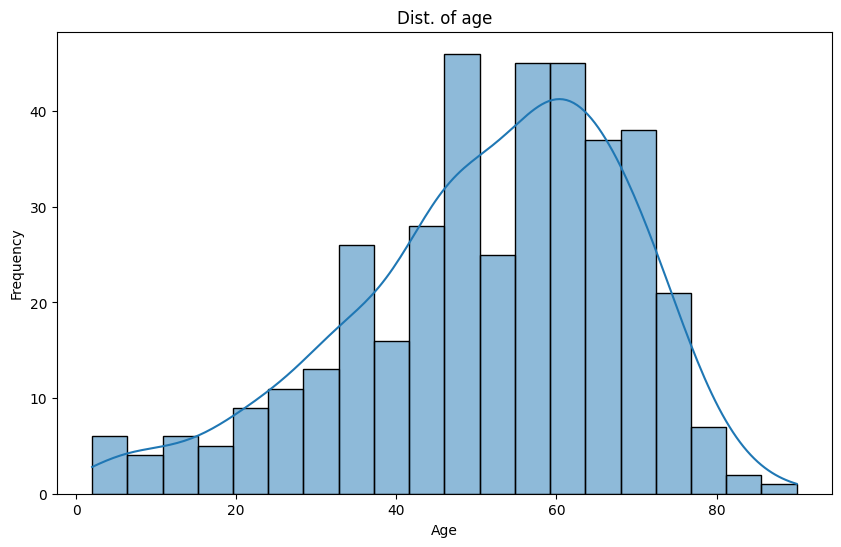

In [32]:
#1. Histogram of age column

plt.figure(figsize=(10,6))
sns.histplot(df["age"].dropna(),bins=20,kde=True)
plt.title("Dist. of age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [33]:
#insights : Age is left skew data

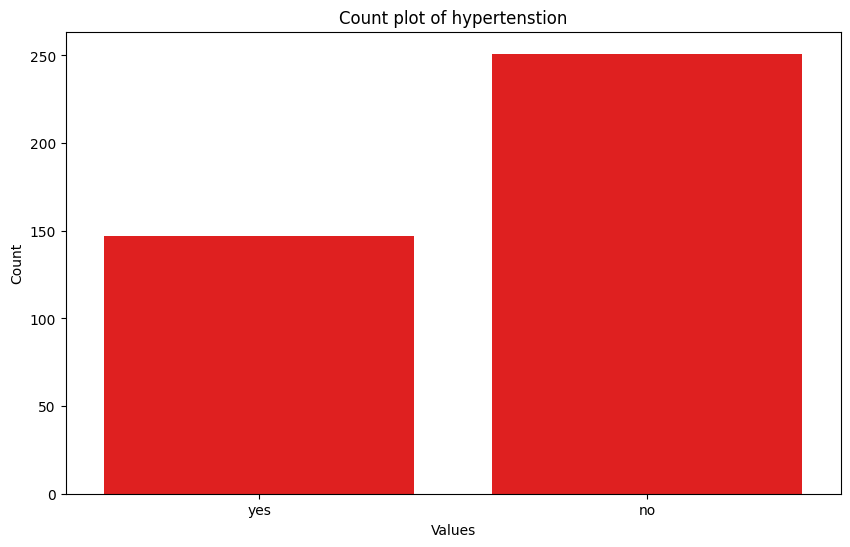

In [34]:
#2. Count plot of hypertension

plt.figure(figsize=(10,6))
sns.countplot(x = df["htn"],color="r")
plt.title("Count plot of hypertenstion")
plt.xlabel("Values")
plt.ylabel("Count")
plt.show()



In [35]:
#Insights: Most of people has not hypertenstion

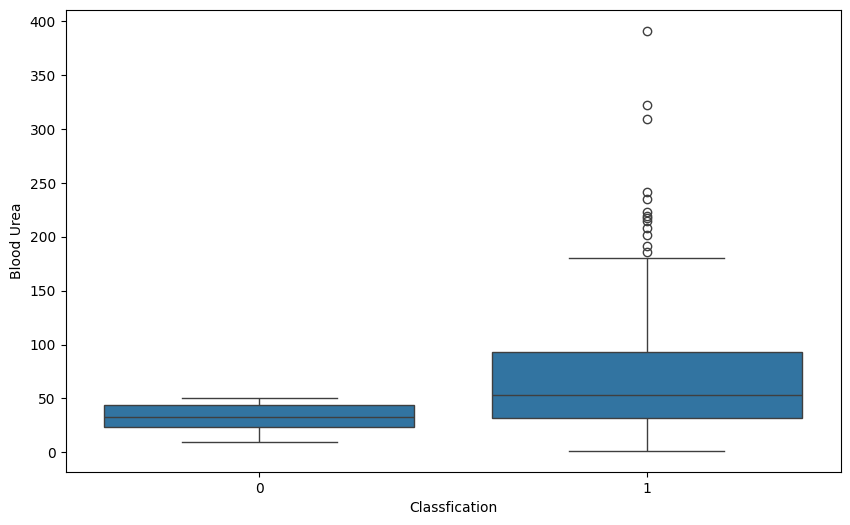

In [36]:
#3. Make a boxplot of classification W.R.T blood_urea

plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="classification",y="bu")
plt.xlabel("Classfication")
plt.ylabel("Blood Urea")
plt.show()

In [37]:
#insights: People with kidney disease has higher blood urea with outliers, median value is also higher

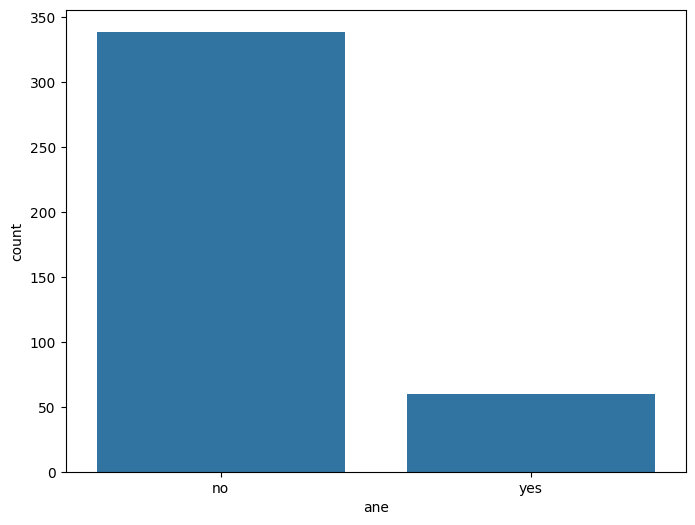

In [38]:
#4. Count plot of how many people has anemia or not
plt.figure(figsize=(8,6))
sns.countplot(data=df,x="ane")
plt.show()

In [39]:
#Insights: Majority of people not suffering from anemia

In [40]:
#5. Pie chart of appetite
df["appet"].unique()

array(['good', 'poor', nan], dtype=object)

<Axes: ylabel='count'>

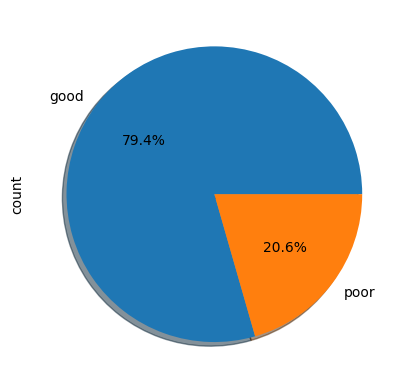

In [41]:
df["appet"].value_counts().plot.pie(autopct="%1.1f%%",shadow=True)

In [42]:
#Insights: Many of people appetite has good

<Axes: xlabel='pcc', ylabel='count'>

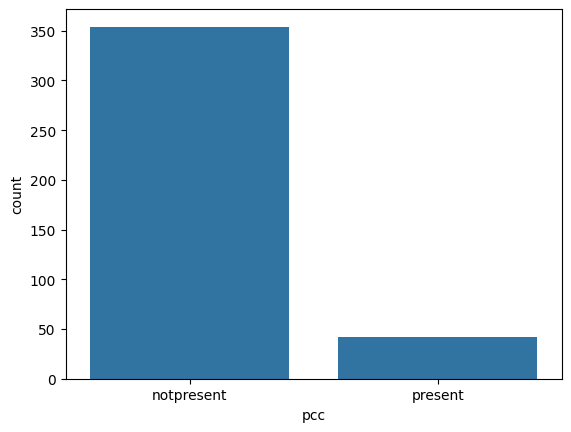

In [43]:
#6. Count plot of pus_cell_clumps
sns.countplot(data=df,x="pcc")

In [44]:
#Insights: Most of people has not present pcc

<Axes: xlabel='wc', ylabel='Count'>

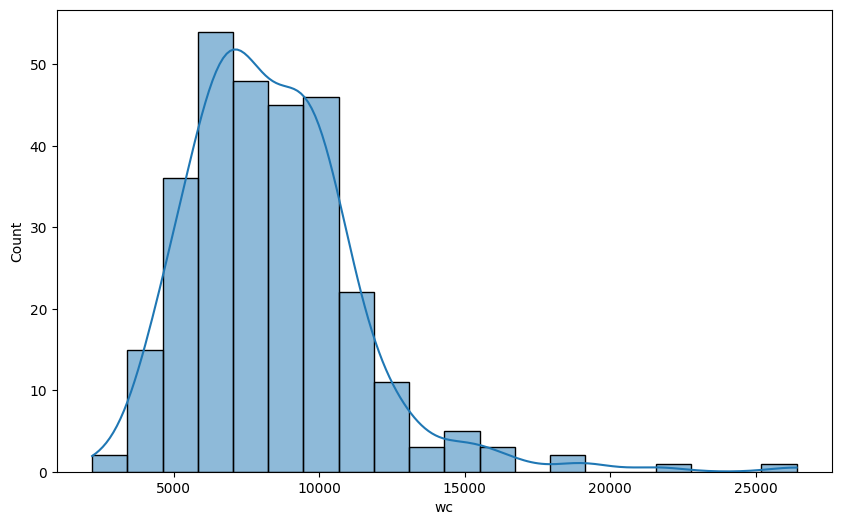

In [45]:
#7. Hist plot of white blood cell count
plt.figure(figsize=(10,6))
sns.histplot(df["wc"],kde=True,bins=20)

<Axes: ylabel='count'>

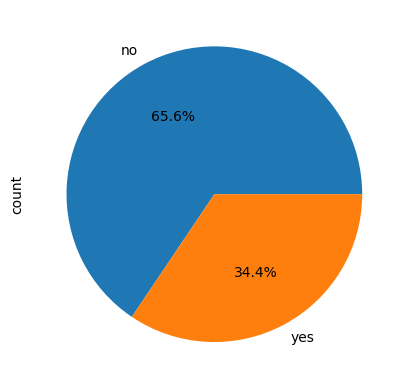

In [46]:
#8. Pie chart of diabetes mellitus
df["dm"].value_counts().plot.pie(autopct="%1.1f%%")

In [47]:
#Insights: 34.4% People suffering from diabetes_mellitus

**Bivariate analysis**

<Axes: xlabel='age', ylabel='bp'>

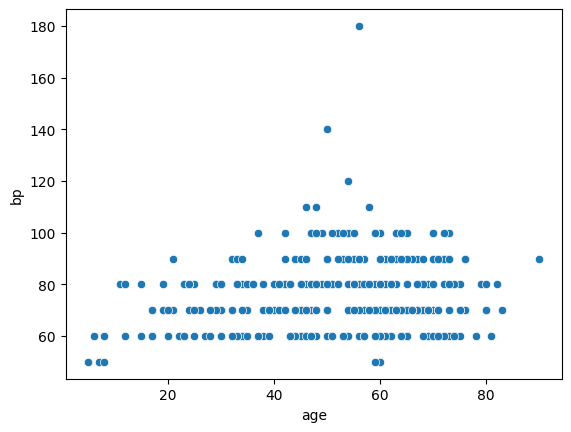

In [ ]:
#9. Scatter plot between age and blood
sns.scatterplot(data=df,x="age",y="bp")

In [53]:
#Innsights: Age is increasing, bp is also increasing

<Axes: xlabel='age', ylabel='bp'>

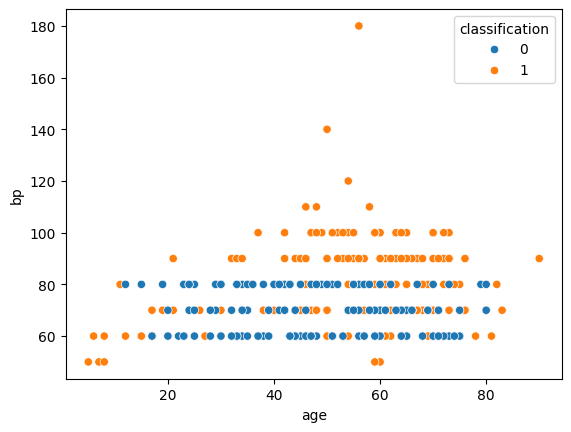

In [54]:
#10. Scatter plot between age and blood...hue = "classification"

sns.scatterplot(data=df,x="age",y="bp",hue="classification")

In [ ]:
#Innsights: Age is increasing, bp is also increasing as well kidney disease also increasing

<Axes: xlabel='dm', ylabel='al'>

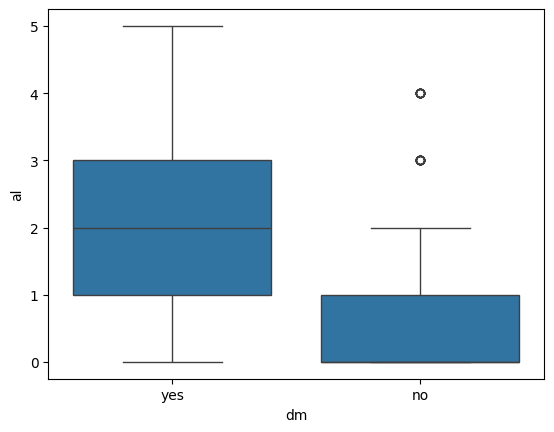

In [56]:
#11. Box plot of diabetes mellitus and albumin to detect outlier
sns.boxplot(data=df,x="dm",y="al")

In [59]:
#12. Stacked bar chart of diabetes mellitus and hypertension
pd.crosstab(df["dm"],df["htn"])

htn,no,yes
dm,,
no,220,41
yes,31,106


<Axes: xlabel='dm'>

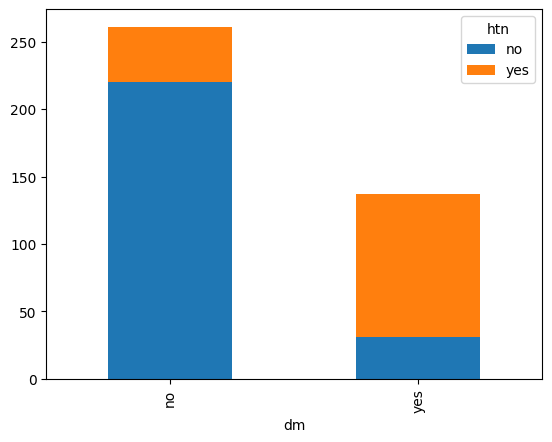

In [61]:
dm_htn = pd.crosstab(df["dm"],df["htn"])
dm_htn.plot(kind="bar",stacked=True)

**Multi variate analysis**

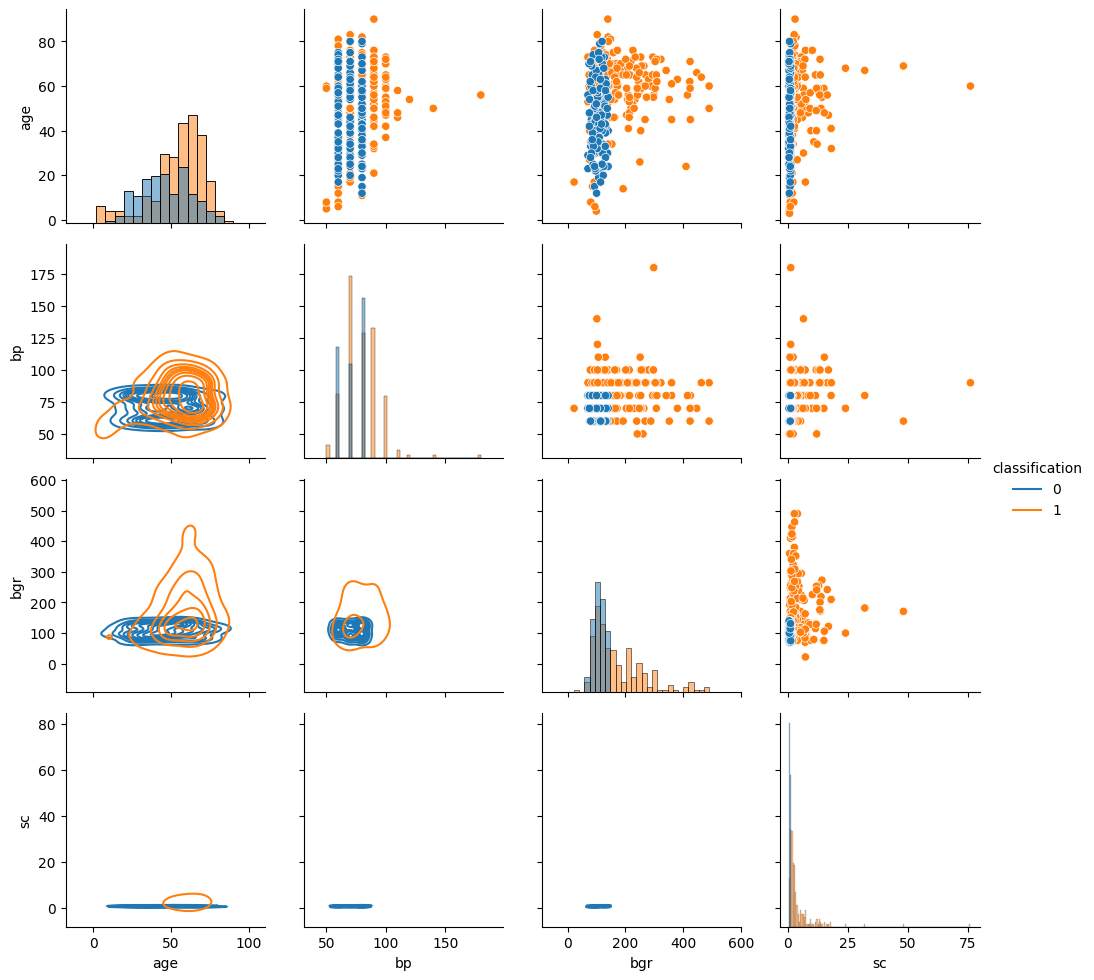

In [ ]:
#Customised Pair plot
cols = ["age","bp","bgr","sc","classification"]
g = sns.PairGrid(data=df[cols],hue="classification")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)
g.add_legend()

plt.show()

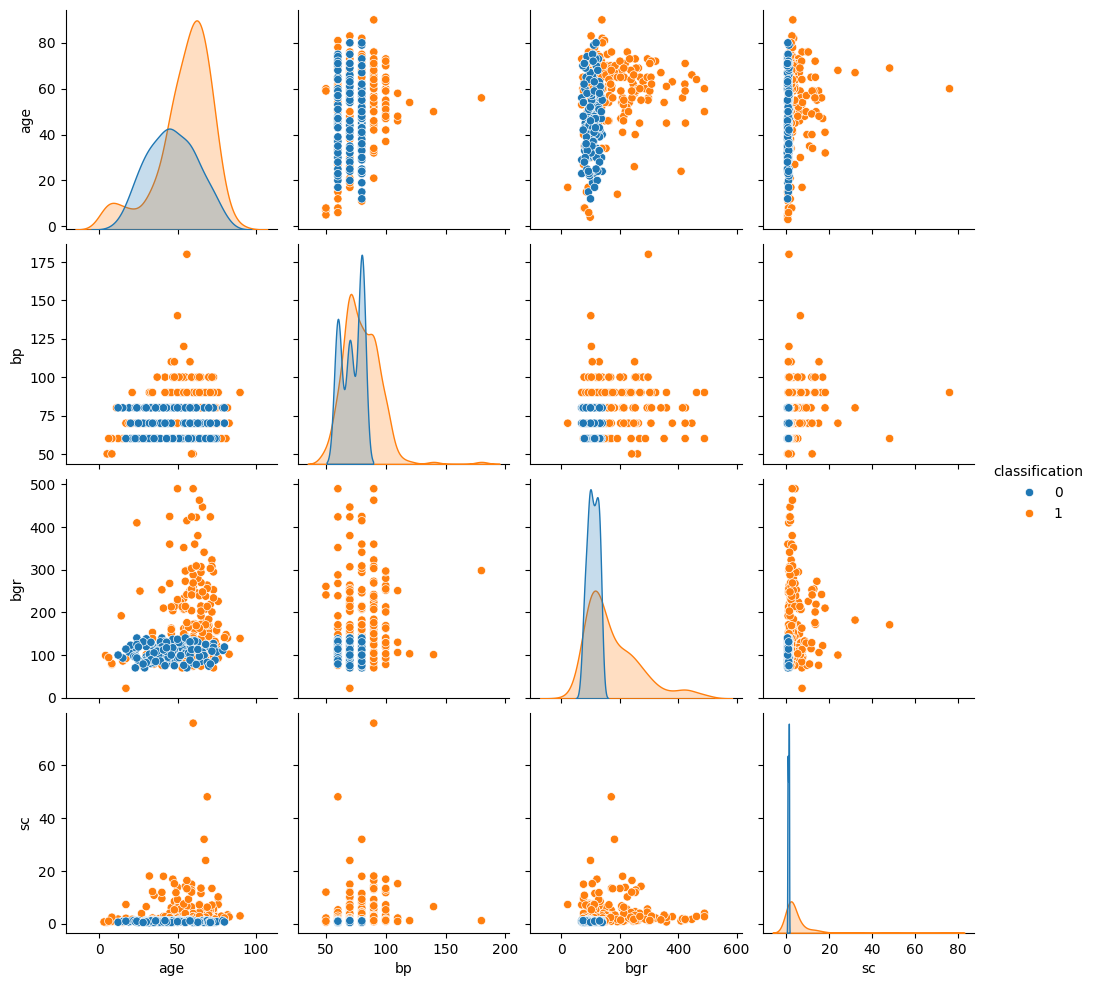

In [74]:
sns.pairplot(df[cols],hue="classification")

<Axes: >

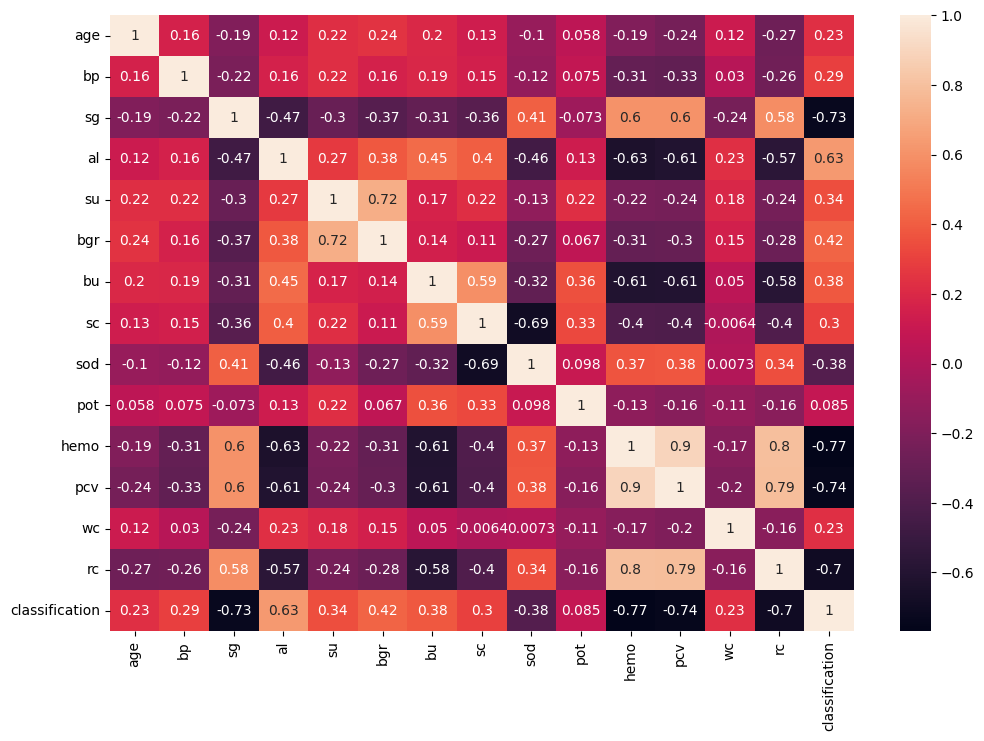

In [77]:
#13. Make heat map

corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)

In [80]:
#14. Scatter plot using plotly
fig = px.scatter(data_frame=df,x="age",y="bp",color="classification")
fig.show()

In [82]:
#15. Correlation using plotly
corr = df.corr(numeric_only=True)
go.Figure(data=go.Heatmap(z = corr.values,x=corr.columns,y=corr.index))

**Null values treatments**

In [83]:
#Replace with median or mean for numeric columns
df.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [84]:
#Replace with median values
median_values = df[numeric_col].median()

In [89]:
df[numeric_col]=df[numeric_col].fillna(median_values)

In [90]:
df.isnull().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [92]:
#For categorical column
mode_values = df.mode().iloc[0]
df[obj_column] = df[obj_column].fillna(mode_values)

In [93]:
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

**Encoding**